# Model Architecture

- Author: Dr. Daning Huang
- Date: 12/21/2025

In [5]:
%run ./figures.ipynb

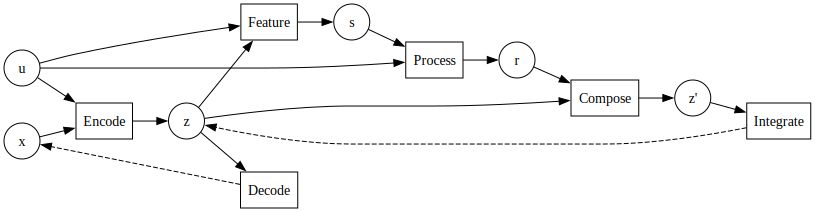

In [6]:
model_arch

Autoencoder:

| Component | Full | State-only | None |
| --- | --- | --- | --- |
| Encoder  | $z = f_E(x, u)$ | $z = f_E(x)$ | $z = x$ |
| Decoder  | $x = f_D(z)$    | $x = f_D(z)$ | $x = z$ |

Dynamics:
$$
z' = f_C(z, u; f_F, f_P)
$$
with

| Component | Expression       |
| --- | --- |
| Feature   | $s = f_F(z, u)$  |
| Processor | $r = f_P(s, u)$  |
| Composer  | $z' = f_C(z, r)$ |

LDM: Full autoencoder, with

| Component | Expression       | Standard        | RNN |
| --- | --- | --- | --- |
| Feature   | $s = f_F(z, u)$  | $s = z$         | ``  |
| Processor | $r = f_P(s, u)$  | $r = f_P(s, u)$ | ``  |
| Composer  | $z' = f_C(z, r)$ | $z' = r$        | $z' = [z_{2:T}, r]$ |

LFM: State-only autoencoder, with

| Component | Expression       | Auto | LTI | KBF-1 | KBF-2 |
| --- | --- | --- | --- | --- | --- |
| Feature   | $s = f_F(z, u)$  | $s = z$  | $s = [z, u]$ | $s = [z, z u]$ | $s = [z, z u, u]$ |
| Processor | $r = f_P(s, u)$  | $r = Ps$ | `` | `` | `` |
| Composer  | $z' = f_C(z, r)$ | $z' = r$ | `` | `` | `` |

KM: State-only autoencoder, with

| Component | Expression       | Direct             | Skip |
| --- | --- | --- | --- |
| Feature   | $s = f_F(z, u)$  | as in LFM          | ``   |
| Processor | $r = f_P(s, u)$  | $r = k(s,S)\alpha$ | ``   |
| Composer  | $z' = f_C(z, r)$ | $z' = r$           | $z' = z + r$ |

CORR-ALG: No autoencoding, with

| Component | Expression       | ALG                 |
| --- | --- | --- |
| Feature   | $s = f_F(z, u)$  | $s = z$             |
| Processor | $r = f_P(s, u)$  | $r = f_P(x,u)$      |
| Composer  | $z' = f_C(z, r)$ | $z' = f_U(x,u) + r$ |

CORR-DIFF: Standard autoencoding, with

| Component | Expression       | DIFF                 |
| --- | --- | --- |
| Feature   | $s = f_F(z, u)$  | $s = z$              |
| Processor | $r = f_P(s, u)$  | $r = f_P(s,u)$       |
| Composer  | $z' = f_C(z, r)$ | $z' = \begin{bmatrix}f_U(z,u) + r \\ f_H(z,u)\end{bmatrix}$ |